## Tentando entender composição de sinais por meio de harmônicas

Primeiro, quero tentar visualizar a propriedade de w0.N = 2.pi.k para ser periodico

Era esperado que as ferquencias fossem 8, 6 e 3. É exatamente isso que vemos na primeira imagem

In [2]:
import numpy as np
import matplotlib.pyplot as plt

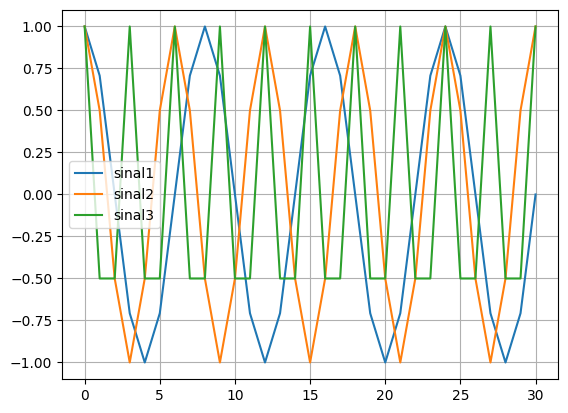

In [3]:
n_pontos = 30
n = np.linspace(0, n_pontos, n_pontos + 1) # 0 a 100 incluindo 100

sinal1 = np.cos(2*np.pi*n / 8)
sinal2 = np.cos(2*np.pi*n / 6)
sinal3 = np.cos(2*np.pi*n * 2 / 6)

plt.plot(n, sinal1, label='sinal1')
plt.plot(n, sinal2, label='sinal2')
plt.plot(n, sinal3, label='sinal3')
plt.legend()
plt.grid()

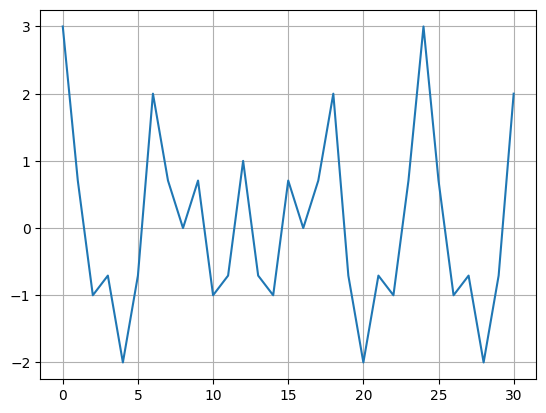

In [4]:
sinal = sinal1 + sinal2 + sinal3

plt.plot(n, sinal, label='sinal')
plt.grid()

Era exatamente isso que precisamos ver, o período de MMC(8, 6, 3) = 24.

Agora quero ver o que acontece quando tem harmônicos

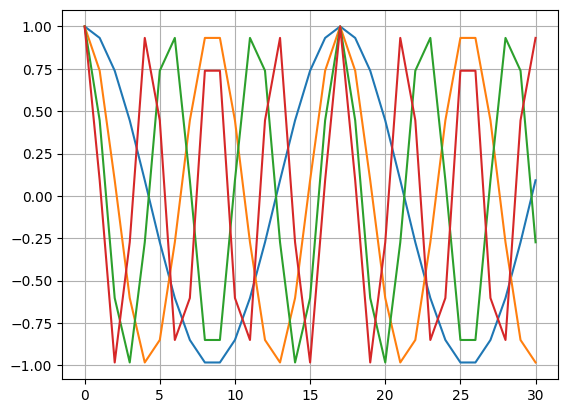

In [5]:
# sinal1 = np.cos(1 * 2*np.pi*n / 17 + np.random.uniform(0, 2*np.pi))
sinal1 = np.cos(1 * 2*np.pi*n / 17)
sinal2 = np.cos(2 * 2*np.pi*n / 17)
sinal3 = np.cos(3 * 2*np.pi*n / 17)
sinal4 = np.cos(4 * 2*np.pi*n / 17)

plt.plot(n, sinal1, label='sinal1')
plt.plot(n, sinal2, label='sinal2')
plt.plot(n, sinal3, label='sinal3')
plt.plot(n, sinal4, label='sinal4')
plt.grid()

Todos aqui são periódicos com período 17

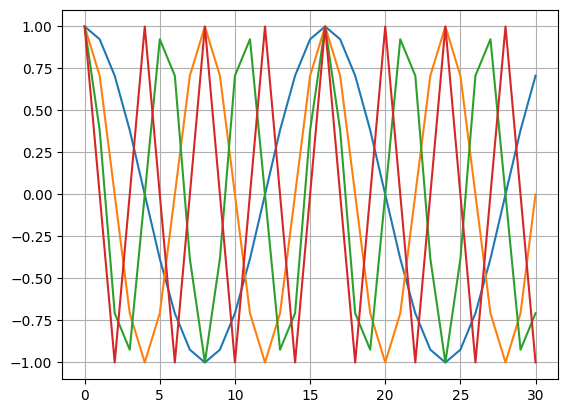

In [6]:
# sinal1 = np.cos(1 * 2*np.pi*n / 17 + np.random.uniform(0, 2*np.pi))
sinal1 = np.cos(1 * 2*np.pi*n / 16)
sinal2 = np.cos(2 * 2*np.pi*n / 16)
sinal3 = np.cos(3 * 2*np.pi*n / 16)
sinal4 = np.cos(4 * 2*np.pi*n / 16)

plt.plot(n, sinal1, label='sinal1')
plt.plot(n, sinal2, label='sinal2')
plt.plot(n, sinal3, label='sinal3')
plt.plot(n, sinal4, label='sinal4')
plt.grid()

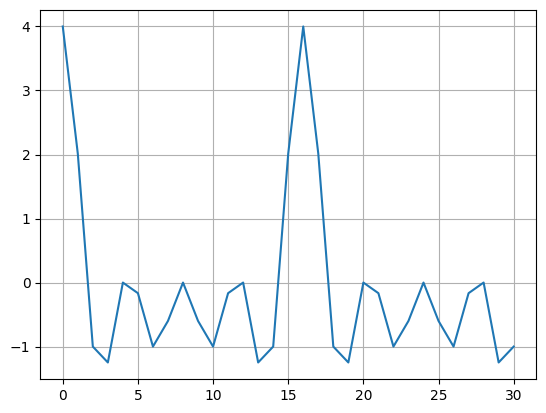

In [7]:
sinal = sinal1 + sinal2 + sinal3 + sinal4

plt.plot(n, sinal, label='sinal')
plt.grid()

## Tentando entender os vetores da base

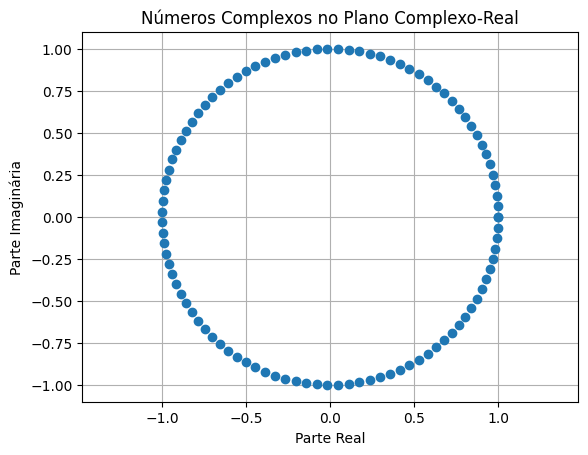

[1.        +0.j         0.99798668+0.06342392j 0.99195481+0.12659245j
 0.9819287 +0.18925124j 0.9679487 +0.25114799j 0.95007112+0.31203345j
 0.92836793+0.37166246j 0.90292654+0.42979491j 0.87384938+0.48619674j
 0.84125353+0.54064082j]


In [8]:
angulos = np.linspace(0, 2 * np.pi, 100)

complexos = np.exp(1j * angulos)


plt.plot(complexos.real, complexos.imag, 'o')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Números Complexos no Plano Complexo-Real')
plt.grid()
plt.axis('equal')
plt.show()

print(complexos[:10])


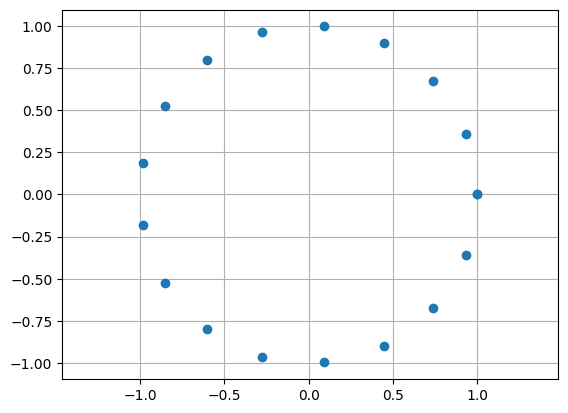

In [9]:
N = 17
n = np.linspace(0, N, N + 1)

vetor_base_1 = np.exp(- 1j * 2 * np.pi * 1 * n / N)

plt.plot(vetor_base_1.real, vetor_base_1.imag, 'o')
plt.grid()
plt.axis('equal')
plt.show()

# Tentando entender filtro passa-baixa e Resposta em Frequência

[ 1.00000000e+00+0.00000000e+00j  9.53356206e-01-2.44780270e-01j
  8.21937053e-01-4.51863719e-01j  6.29462985e-01-5.91105088e-01j
  4.09828941e-01-6.45787076e-01j  2.00000000e-01-6.15536707e-01j
  3.24440912e-02-5.15684062e-01j -7.12080982e-02-3.73285923e-01j
 -1.03898238e-01-2.20794994e-01j -7.35218348e-02-8.88726315e-02j
  0.00000000e+00+0.00000000e+00j  9.01493322e-02+3.56926456e-02j
  1.70375533e-01+2.15234352e-02j  2.20211851e-01-2.78192263e-02j
  2.29527524e-01-9.08763757e-02j  2.00000000e-01-1.45308506e-01j
  1.43599713e-01-1.73582235e-01j  7.86169250e-02-1.67069470e-01j
  2.43449780e-02-1.27620844e-01j -4.17376389e-03-6.63400773e-02j
 -2.77555756e-17+0.00000000e+00j  3.41900608e-02+5.38749151e-02j
  8.72406739e-02+8.19244458e-02j  1.42916337e-01+7.85689213e-02j
  1.84599731e-01+4.73971550e-02j  2.00000000e-01-5.55111512e-17j
  1.84599731e-01-4.73971550e-02j  1.42916337e-01-7.85689213e-02j
  8.72406739e-02-8.19244458e-02j  3.41900608e-02-5.38749151e-02j
 -2.77555756e-17+0.000000

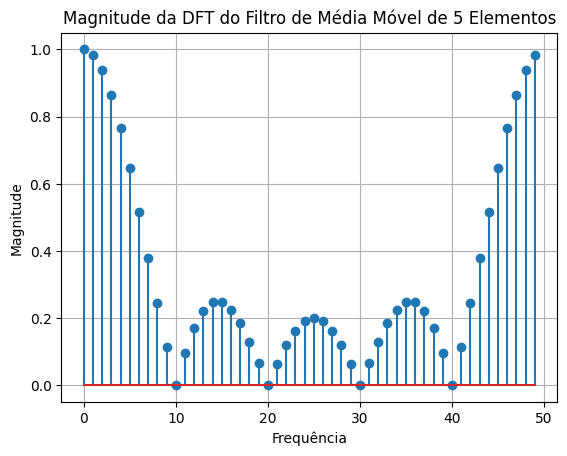

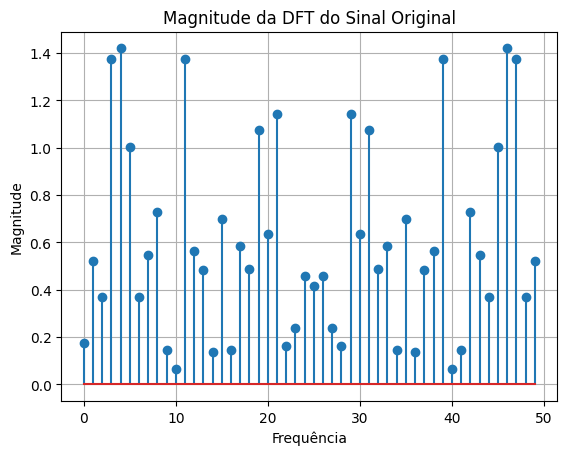

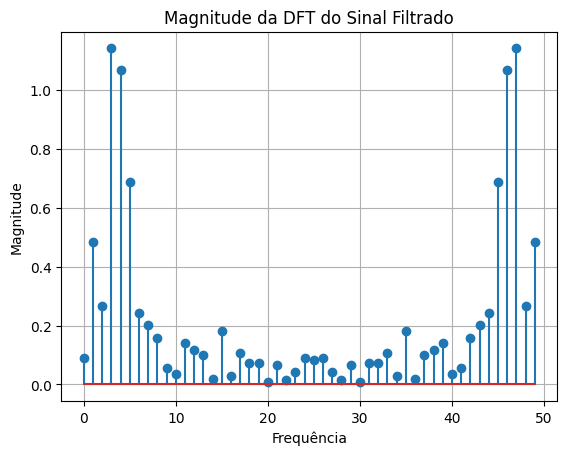

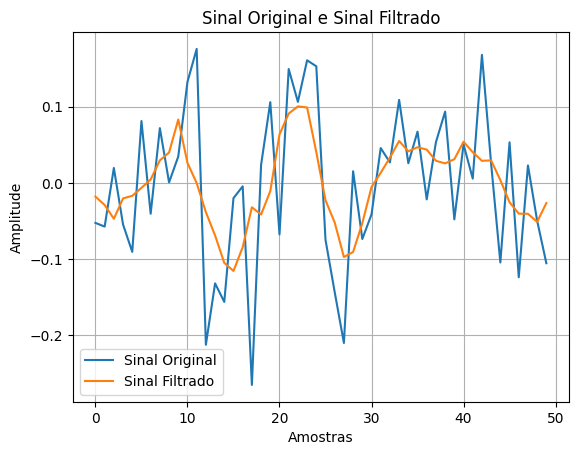

In [10]:
# Criar o filtro de média móvel de 5 elementos
numero_pontos_sinal = 50
filtro = np.ones(5) / 5

# Calcular a DFT do filtro
dft_filtro = np.fft.fft(filtro, numero_pontos_sinal)

print(dft_filtro)

# Plotar a magnitude da DFT
plt.stem(np.abs(dft_filtro))
plt.title('Magnitude da DFT do Filtro de Média Móvel de 5 Elementos')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Criar um sinal de numero_pontos_sinal pontos
# sinal_numero_pontos_sinal = np.sin(2 * np.pi * np.linspace(0, 1, numero_pontos_sinal)) + np.random.normal(0, 0.1, numero_pontos_sinal)
sinal_numero_pontos_sinal = np.random.normal(0, 0.1, numero_pontos_sinal)

# Plotar a magnitude da DFT do sinal original
plt.stem(np.abs(np.fft.fft(sinal_numero_pontos_sinal, numero_pontos_sinal)))
plt.title('Magnitude da DFT do Sinal Original')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Aplicar o filtro de média móvel no sinal
sinal_filtrado = np.convolve(sinal_numero_pontos_sinal, filtro, mode='same')

# Plotar a magnitude da DFT do sinal filtrado
plt.stem(np.abs(np.fft.fft(sinal_filtrado)))
plt.title('Magnitude da DFT do Sinal Filtrado')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Plotar o sinal original e o sinal filtrado
plt.plot(sinal_numero_pontos_sinal, label='Sinal Original')
plt.plot(sinal_filtrado, label='Sinal Filtrado')
plt.legend()
plt.grid()
plt.title('Sinal Original e Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

Na verdade, faz mais sentido analisar a dft com muuuuitos pontos, visto que vc quer analisar a TRANSFORMADA e não a SÉRIE quando vai fazer convolução dos pontos

[1.        +0.j         0.99999882-0.00125664j 0.99999526-0.00251327j ...
 0.99998934+0.00376989j 0.99999526+0.00251327j 0.99999882+0.00125664j]


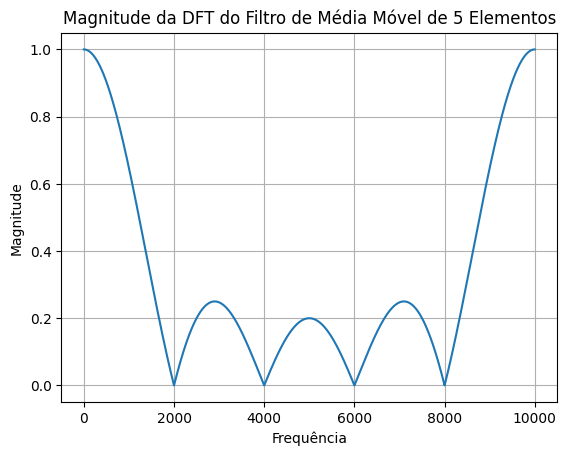

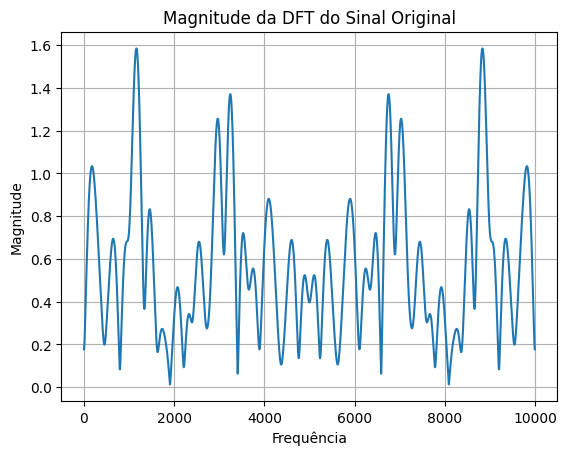

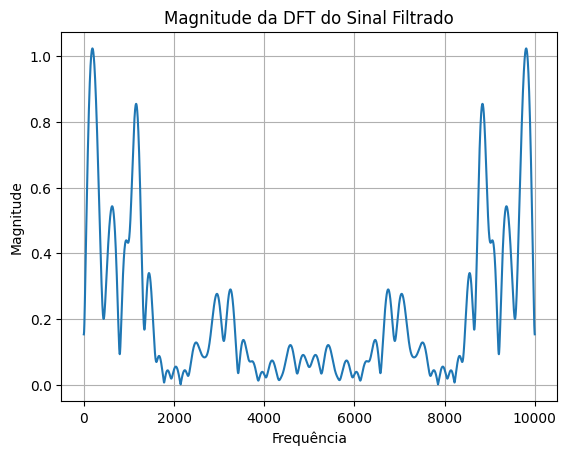

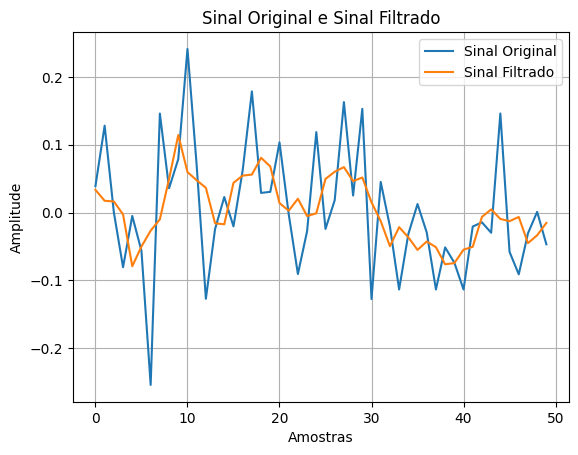

In [11]:
# Criar o filtro de média móvel de 5 elementos
numero_pontos_sinal = 50
numero_pontos_dft = 10000
filtro = np.ones(5) / 5

# Calcular a DFT do filtro
dft_filtro = np.fft.fft(filtro, numero_pontos_dft)

print(dft_filtro)

# Plotar a magnitude da DFT
plt.plot(np.abs(dft_filtro))
plt.title('Magnitude da DFT do Filtro de Média Móvel de 5 Elementos')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Criar um sinal de numero_pontos_sinal pontos
# sinal_numero_pontos_sinal = np.sin(2 * np.pi * np.linspace(0, 1, numero_pontos_sinal)) + np.random.normal(0, 0.1, numero_pontos_sinal)
sinal_numero_pontos_sinal = np.random.normal(0, 0.1, numero_pontos_sinal)

# Plotar a magnitude da DFT do sinal original
plt.plot(np.abs(np.fft.fft(sinal_numero_pontos_sinal, numero_pontos_dft)))
plt.title('Magnitude da DFT do Sinal Original')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Aplicar o filtro de média móvel no sinal
sinal_filtrado = np.convolve(sinal_numero_pontos_sinal, filtro, mode='same')

# Plotar a magnitude da DFT do sinal filtrado
plt.plot(np.abs(np.fft.fft(sinal_filtrado, numero_pontos_dft)))
plt.title('Magnitude da DFT do Sinal Filtrado')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Plotar o sinal original e o sinal filtrado
plt.plot(sinal_numero_pontos_sinal, label='Sinal Original')
plt.plot(sinal_filtrado, label='Sinal Filtrado')
plt.legend()
plt.grid()
plt.title('Sinal Original e Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

Dá pra perceber mais uma coisa legal:
Quando o número de pontos é pequeno, a DFT do sinal é meio aleatória, quando na vdd deveria ser uma reta

[1.        +0.j         0.9999997 -0.00062832j 0.99999882-0.00125664j ...
 0.99999734+0.00188495j 0.99999882+0.00125664j 0.9999997 +0.00062832j]


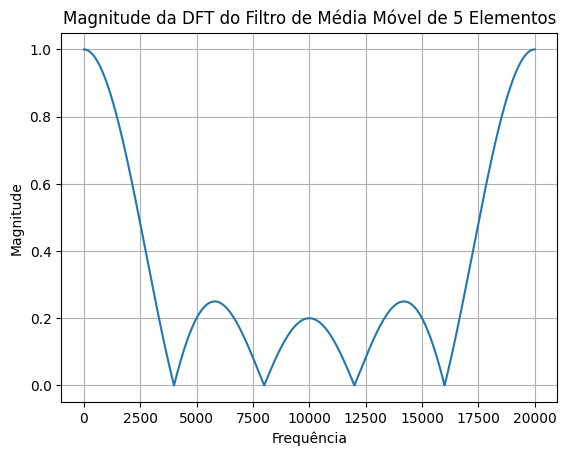

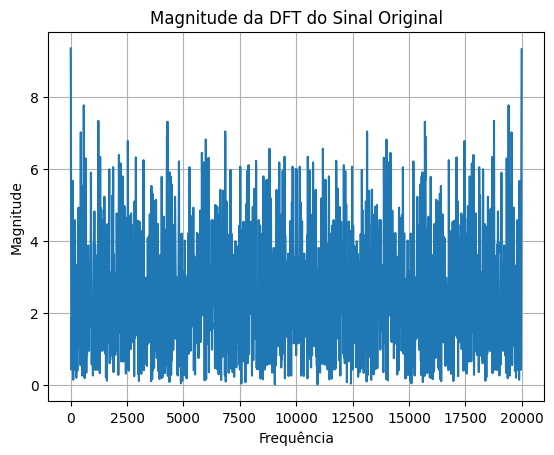

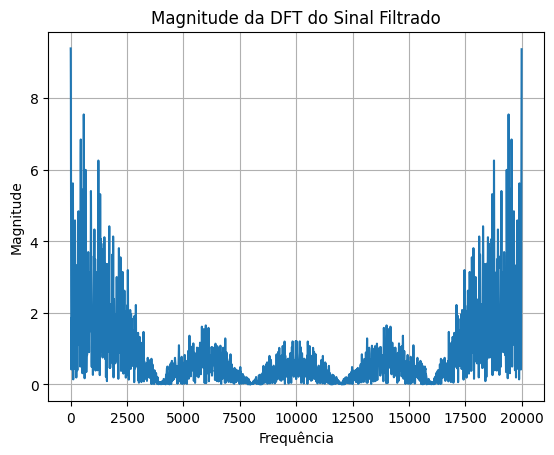

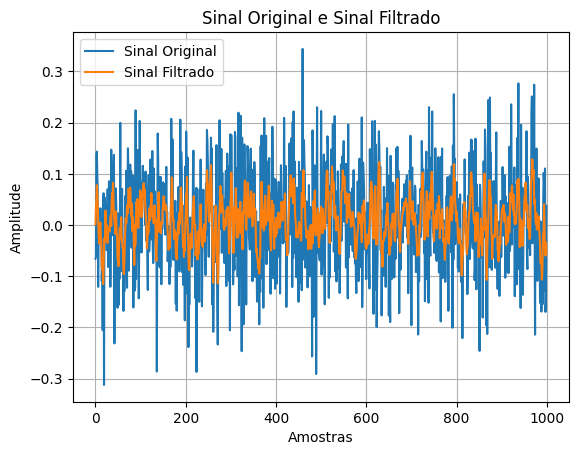

In [12]:
# Criar o filtro de média móvel de 5 elementos
numero_pontos_sinal = 1000
numero_pontos_dft = 20*numero_pontos_sinal
filtro = np.ones(5) / 5

# Calcular a DFT do filtro
dft_filtro = np.fft.fft(filtro, numero_pontos_dft)

print(dft_filtro)

# Plotar a magnitude da DFT
plt.plot(np.abs(dft_filtro))
plt.title('Magnitude da DFT do Filtro de Média Móvel de 5 Elementos')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Criar um sinal de numero_pontos_sinal pontos
# sinal_numero_pontos_sinal = np.sin(2 * np.pi * np.linspace(0, 1, numero_pontos_sinal)) + np.random.normal(0, 0.1, numero_pontos_sinal)
sinal_numero_pontos_sinal = np.random.normal(0, 0.1, numero_pontos_sinal)

# Plotar a magnitude da DFT do sinal original
plt.plot(np.abs(np.fft.fft(sinal_numero_pontos_sinal, numero_pontos_dft)))
plt.title('Magnitude da DFT do Sinal Original')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Aplicar o filtro de média móvel no sinal
sinal_filtrado = np.convolve(sinal_numero_pontos_sinal, filtro, mode='same')

# Plotar a magnitude da DFT do sinal filtrado
plt.plot(np.abs(np.fft.fft(sinal_filtrado, numero_pontos_dft)))
plt.title('Magnitude da DFT do Sinal Filtrado')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Plotar o sinal original e o sinal filtrado
plt.plot(sinal_numero_pontos_sinal, label='Sinal Original')
plt.plot(sinal_filtrado, label='Sinal Filtrado')
plt.legend()
plt.grid()
plt.title('Sinal Original e Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

Outra coisa legal de se perceber: o sinal filtrado não é exatamente muito bom porque a largura do lóbulo central ainda é muito aberta

O ideal seria manter a largura bem estreita. Mas isso pode atenuar as frequencias principais dos inal.

Então o que vc geralmente quer é ter uma ferquencia de amostragem alta para que a frequencia principal caia em uma ferquencia relativa baixa para que seja possível cortar bem... se bem que agora pensando, não é mt assim pelo fato de que a SNR meio que vai ficar a mesma coisa.

[1.        +0.j         0.9999601 -0.00769675j 0.99984042-0.01539256j ...
 0.99964096+0.02308652j 0.99984042+0.01539256j 0.9999601 +0.00769675j]


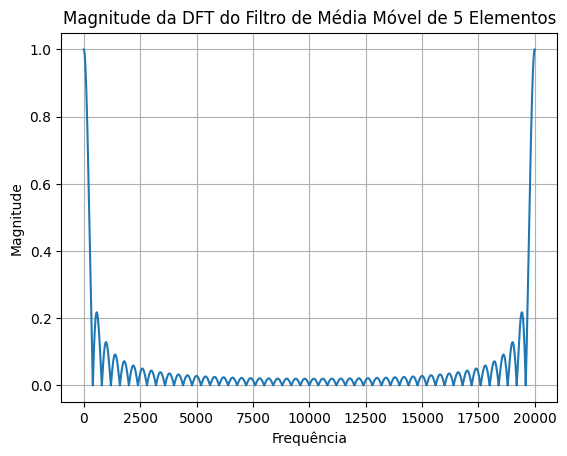

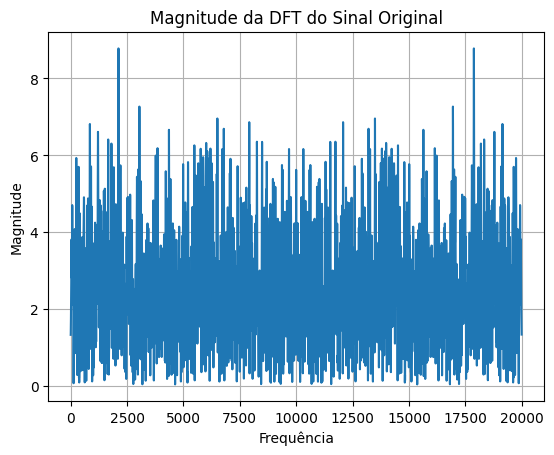

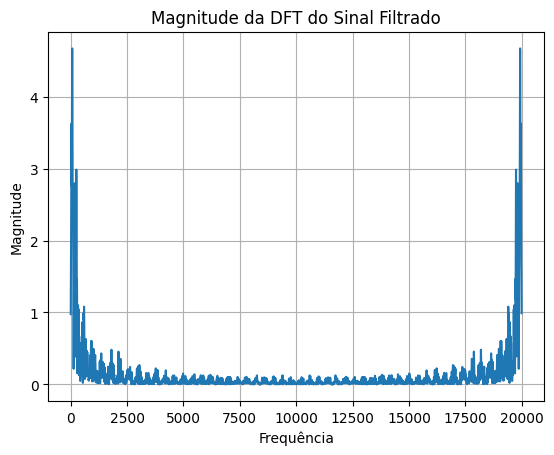

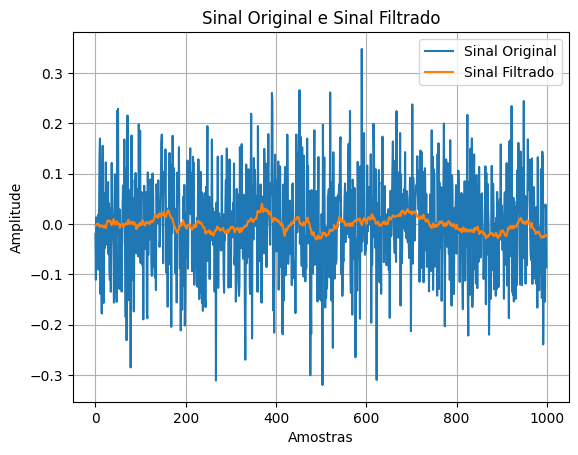

In [13]:
# Criar o filtro de média móvel de 5 elementos
numero_pontos_sinal = 1000
numero_pontos_dft = 20*numero_pontos_sinal
filtro = np.ones(50)
filtro /= np.sum(filtro)

# Calcular a DFT do filtro
dft_filtro = np.fft.fft(filtro, numero_pontos_dft)

print(dft_filtro)

# Plotar a magnitude da DFT
plt.plot(np.abs(dft_filtro))
plt.title('Magnitude da DFT do Filtro de Média Móvel de 5 Elementos')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Criar um sinal de numero_pontos_sinal pontos
# sinal_numero_pontos_sinal = np.sin(2 * np.pi * np.linspace(0, 1, numero_pontos_sinal)) + np.random.normal(0, 0.1, numero_pontos_sinal)
sinal_numero_pontos_sinal = np.random.normal(0, 0.1, numero_pontos_sinal)

# Plotar a magnitude da DFT do sinal original
plt.plot(np.abs(np.fft.fft(sinal_numero_pontos_sinal, numero_pontos_dft)))
plt.title('Magnitude da DFT do Sinal Original')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Aplicar o filtro de média móvel no sinal
sinal_filtrado = np.convolve(sinal_numero_pontos_sinal, filtro, mode='same')

# Plotar a magnitude da DFT do sinal filtrado
plt.plot(np.abs(np.fft.fft(sinal_filtrado, numero_pontos_dft)))
plt.title('Magnitude da DFT do Sinal Filtrado')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# Plotar o sinal original e o sinal filtrado
plt.plot(sinal_numero_pontos_sinal, label='Sinal Original')
plt.plot(sinal_filtrado, label='Sinal Filtrado')
plt.legend()
plt.grid()
plt.title('Sinal Original e Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

# Tentando entender TFD com numero de elementos diferente do valor original

Basicamente, a TFD é definida como o seguinte: Se o sinal é N periódico, você pode extrair os N coeficientes (relativo as N harmonicas de 2pi/N) que o compõe; 

Se um sinal tem exatamente N amostras, você pode fingir que ele é periódico e aplicar a TFD do mesmo jeito.

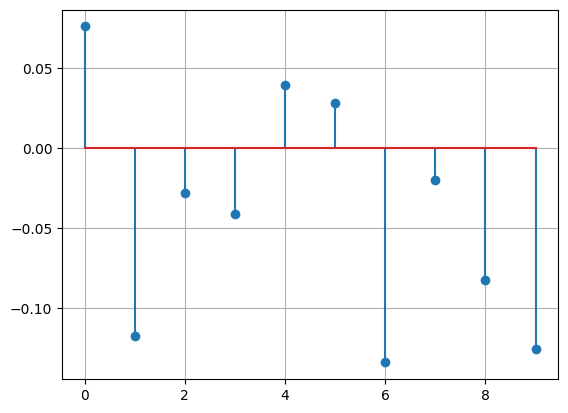

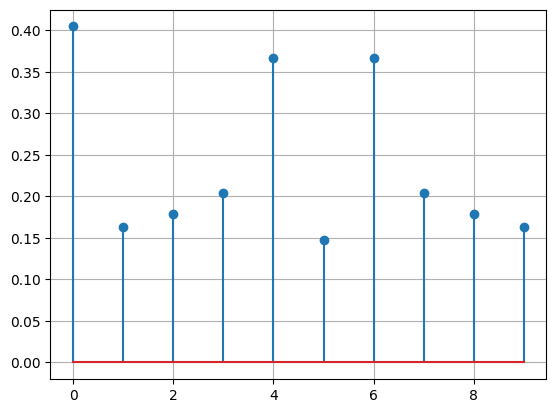

In [14]:
sinal = np.random.normal(0, 0.1, 10)

plt.stem(sinal, 'o')
plt.grid()
plt.show()

fft_sinal = np.fft.fft(sinal)
plt.stem(np.abs(fft_sinal))
plt.grid()
plt.show()

Quando você chama a fft com N_fft < N, ele faz o zero-padding: Adiciona Zeros no final 

Isso aumenta a resolução na frequencia (bom, aumentando N_fft, você diminui o w0, o que quer dizer que o sinal vai tentar ser decomposto em valores menores)

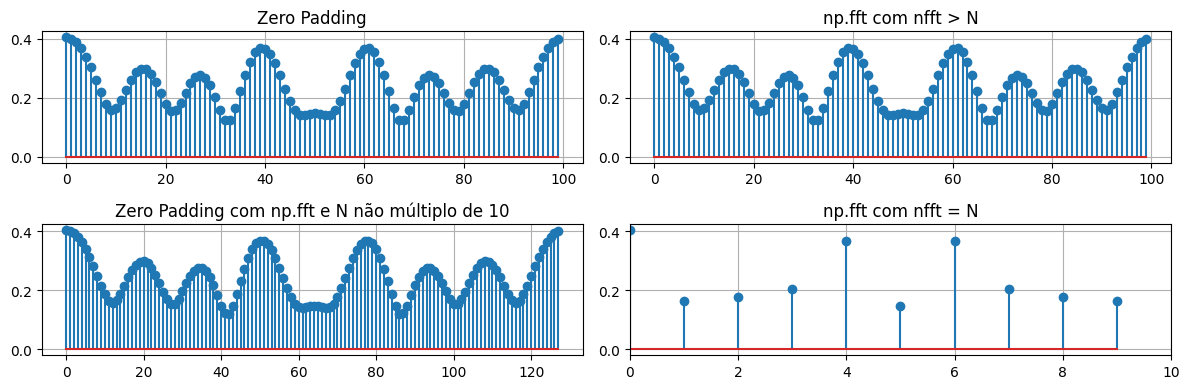

In [15]:
sinal_zero_padding = np.zeros(100)
sinal_zero_padding[:10] = sinal

plt.figure(figsize=(12, 4))
plt.subplot(221)
plt.stem(np.abs(np.fft.fft(sinal_zero_padding)))
plt.title('Zero Padding')
plt.grid()

plt.subplot(222)
plt.stem(np.abs(np.fft.fft(sinal, 100)))
plt.title('np.fft com nfft > N')
plt.grid()

plt.subplot(223)
plt.stem(np.abs(np.fft.fft(sinal_zero_padding, 128)))
plt.title('Zero Padding com np.fft e N não múltiplo de 10')
plt.grid()

plt.subplot(224)
plt.stem(np.abs(np.fft.fft(sinal)))
plt.title('np.fft com nfft = N')
plt.xlim(0, 10)
plt.grid()
plt.tight_layout()
plt.show()


[3.00000000e+00+0.j 1.11022302e-16+0.j 0.00000000e+00+0.j
 3.00000000e+00+0.j 0.00000000e+00+0.j 2.22044605e-16+0.j]


C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


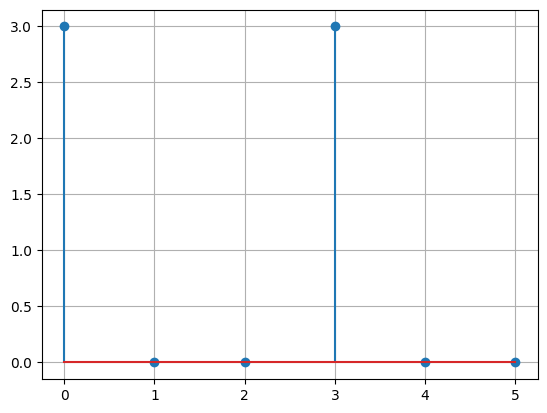

In [16]:
sinal_na_frequencia = [1, 0, 1, 0, 1, 0]
sinal_no_tempo = np.fft.fft(sinal_na_frequencia)

print(sinal_no_tempo)

plt.stem(sinal_no_tempo)
plt.grid()
plt.show()

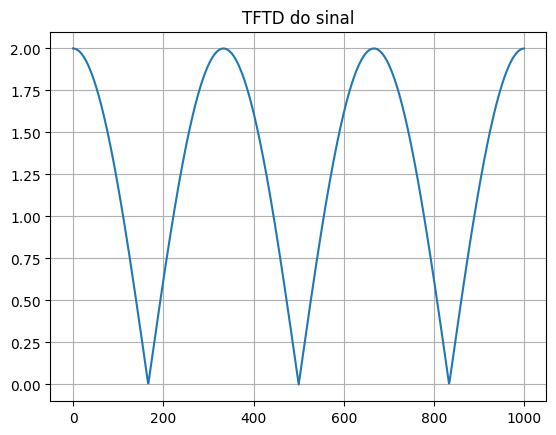

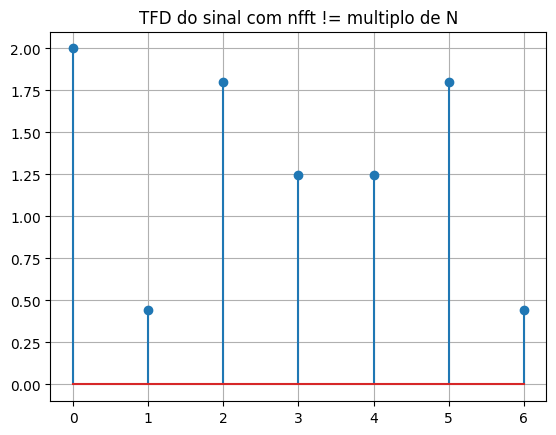

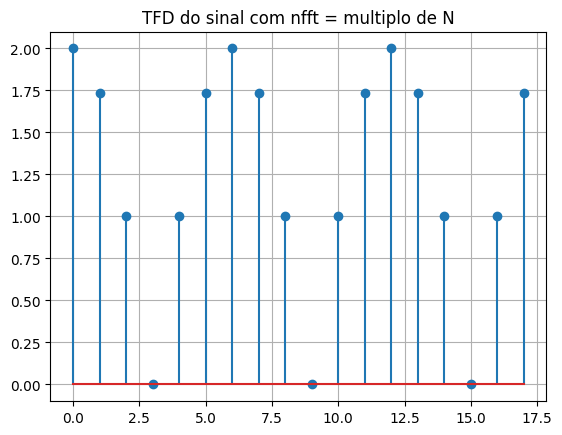

In [17]:
sinal = [1, 0, 0, 1, 0, 0]
sinal = np.array(sinal)
sinal = sinal

plt.plot(np.abs(np.fft.fft(sinal, 1000)))
plt.grid()
plt.title('TFTD do sinal')
plt.show()

plt.stem(np.abs(np.fft.fft(sinal, 7)))
plt.title('TFD do sinal com nfft != multiplo de N')
plt.grid()
plt.show()

plt.stem(np.abs(np.fft.fft(sinal, 18)))
plt.title('TFD do sinal com nfft = multiplo de N')
plt.grid()
plt.show()

Perceba como a TFD quando N_fft não é um multiplo não tem NADA A VER com o que se espera, tipo, você não pode fazer nenhuma análise sobre isso

Agora eu vou tentar ver o que acontece com TRUNCAMENTO (N_fft < N). Basicamente o sistema joga fora as amostras restantes e só usa as primeiras N_fft.

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]


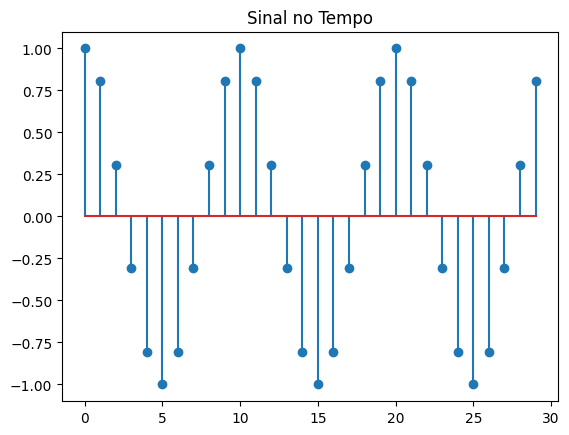

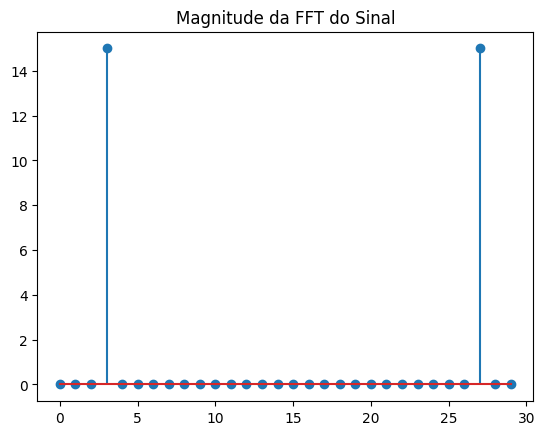

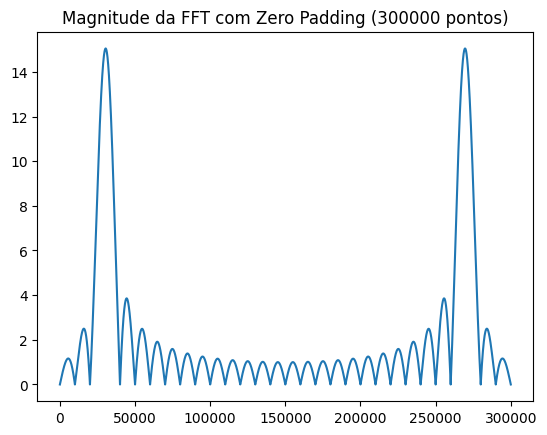

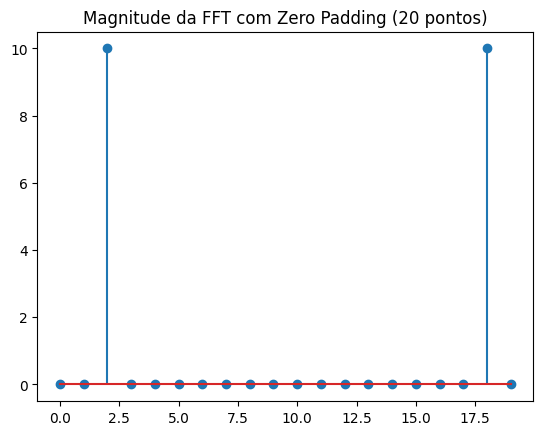

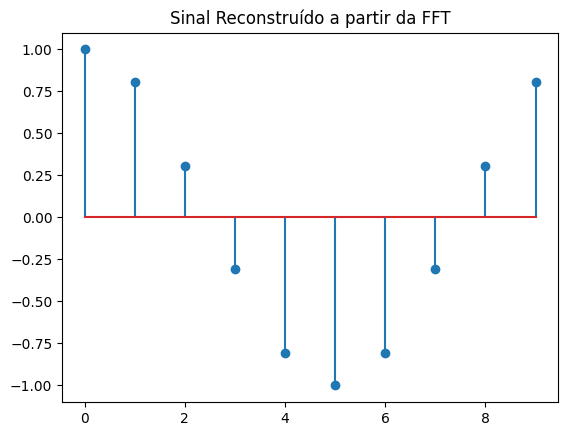

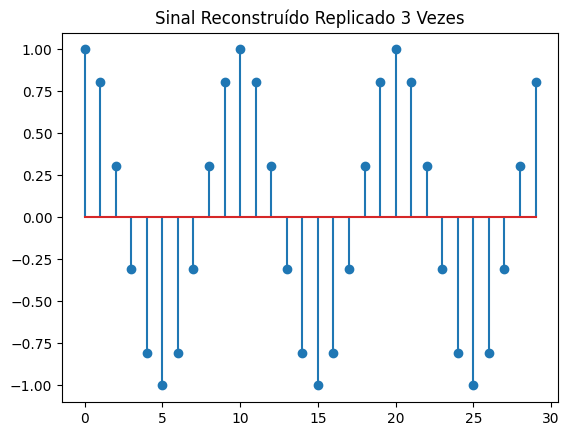

In [18]:
print(np.linspace(0, 29, 30))
sinal = np.cos(2 * np.pi * np.linspace(0, 29, 30) * 0.1)
plt.stem(sinal)
plt.title('Sinal no Tempo')
plt.show()

plt.stem(np.abs(np.fft.fft(sinal)))
plt.title('Magnitude da FFT do Sinal')
plt.show()

plt.plot(np.abs(np.fft.fft(sinal, 300000)))
plt.title('Magnitude da FFT com Zero Padding (300000 pontos)')
plt.show()

plt.stem(np.abs(np.fft.fft(sinal, 20)))
plt.title('Magnitude da FFT com Zero Padding (20 pontos)')
plt.show()

sinal_reconstruido = np.fft.ifft(np.fft.fft(sinal, 10), 10)
plt.stem(sinal_reconstruido)
plt.title('Sinal Reconstruído a partir da FFT')
plt.show()

plt.stem(np.tile(sinal_reconstruido, 3))
plt.title('Sinal Reconstruído Replicado 3 Vezes')
plt.show()

Esse aqui é um resultado MUITO interessante: O que ta acontecendo aqui é que o fft amostrado em N vai dar exatamente o que se espera: Uma raia. Mas quando analisamos com mais pontos, o que acontece é que temos o zero-padding e por isso temos um janelamento no tempo. O que se reflete com uma convolução com um sinc na frequência.

Um outro resultado: Se fizer com N_fft menor, mas de forma que ainda seja múltipla do N0, ainda dá para obter o sinal perfeito

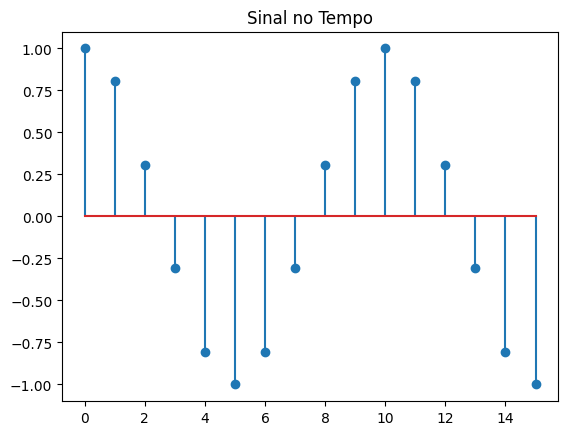

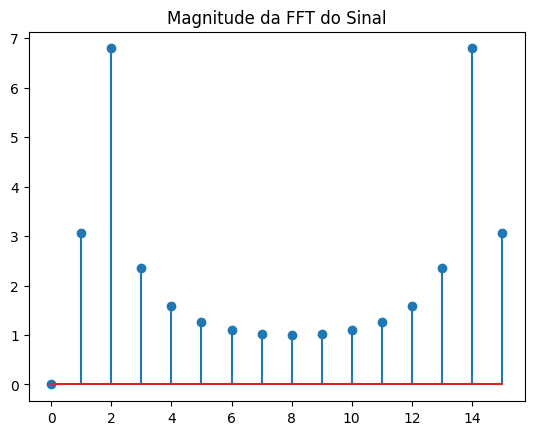

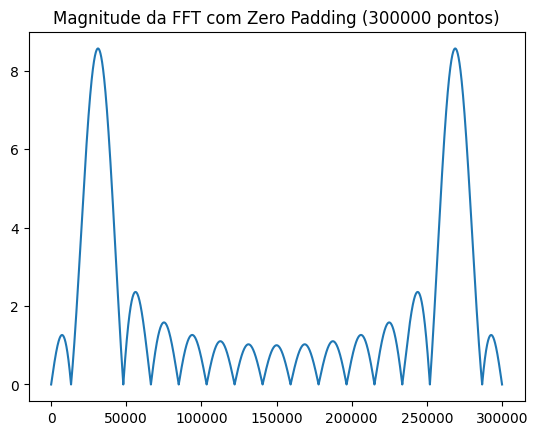

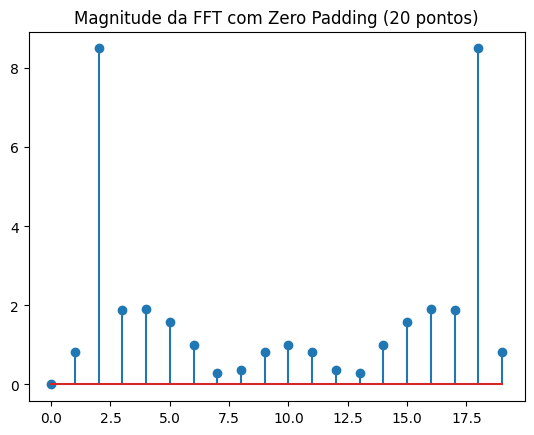

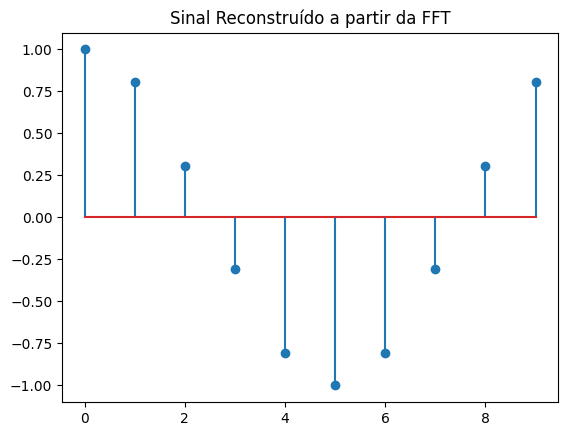

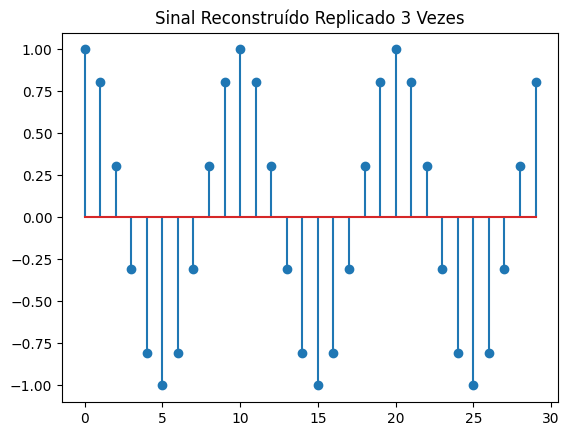

In [21]:
t = np.linspace(0, 15, 16)
sinal = np.cos(2 * np.pi * t * 0.1)
plt.stem(sinal)
plt.title('Sinal no Tempo')
plt.show()

plt.stem(np.abs(np.fft.fft(sinal)))
plt.title('Magnitude da FFT do Sinal')
plt.show()

plt.plot(np.abs(np.fft.fft(sinal, 300000)))
plt.title('Magnitude da FFT com Zero Padding (300000 pontos)')
plt.show()

plt.stem(np.abs(np.fft.fft(sinal, 20)))
plt.title('Magnitude da FFT com Zero Padding (20 pontos)')
plt.show()

sinal_reconstruido = np.fft.ifft(np.fft.fft(sinal, 10), 10)
plt.stem(sinal_reconstruido)
plt.title('Sinal Reconstruído a partir da FFT')
plt.show()

plt.stem(np.tile(sinal_reconstruido, 3))
plt.title('Sinal Reconstruído Replicado 3 Vezes')
plt.show()

# Tentando entender o que acontece quando passa por um filtro

O problema aqui essencialmente é que se o sinal tem N pontos e o filtro tem 5, como eu devo interpretar isso no domínio da frequÊncia?



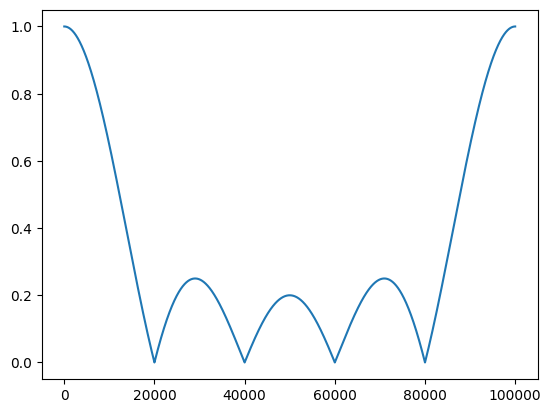

In [22]:
filtro = np.ones(5) / 5
plt.plot(np.abs(np.fft.fft(filtro, 100000)))

C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<StemContainer object of 3 artists>

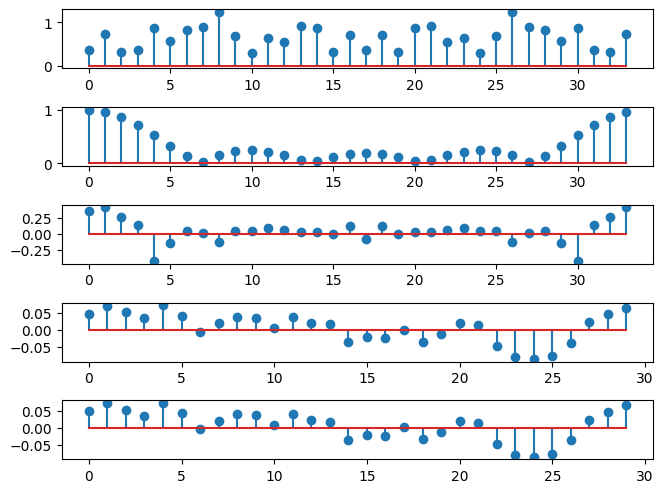

In [34]:
sinal = np.random.normal(0, 0.1, 30)

subplots = 5

fft_sinal = np.fft.fft(sinal, len(sinal) + len(filtro) - 1)
plt.subplot(subplots, 1, 1)
plt.stem(np.abs(fft_sinal))
plt.tight_layout()
# plt.show()

plt.subplot(subplots, 1, 2)
fft_filtro = np.fft.fft(filtro, len(sinal) + len(filtro) - 1)
plt.stem(np.abs(fft_filtro))

plt.subplot(subplots, 1, 3)
mult_fft = fft_sinal * fft_filtro
plt.stem(mult_fft)

plt.subplot(subplots, 1, subplots-1)
sinal_filtrado = np.convolve(sinal, filtro, mode='same')
plt.stem(sinal_filtrado)
# plt.plot(np.abs(np.fft.fft(filtro, 100000)))

plt.subplot(subplots, 1, subplots)
sinal_filtrado_mult = np.fft.ifft(mult_fft)
plt.stem(sinal_filtrado_mult[2:-2])

Perceba que ele croppa as 2 ultimas amostras do sinal e as 2 primeiras

In [2]:
from scipy.signal import freqz

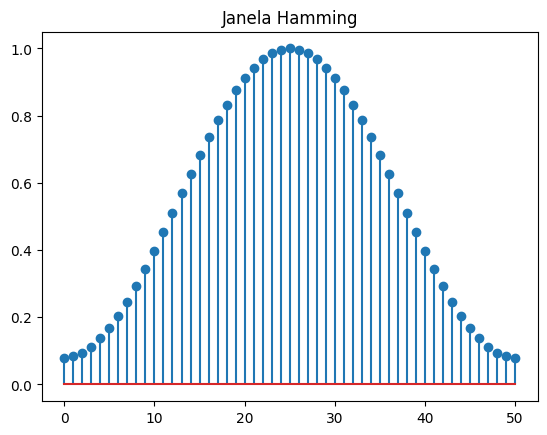

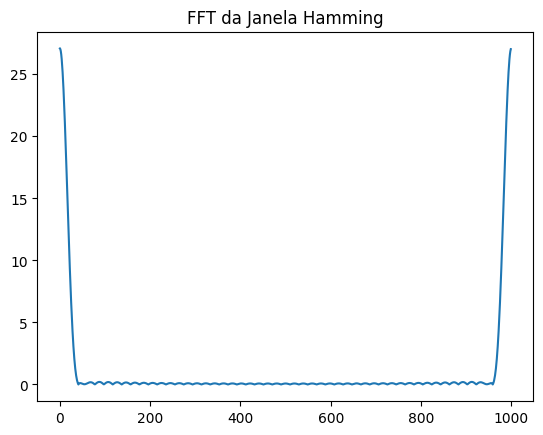

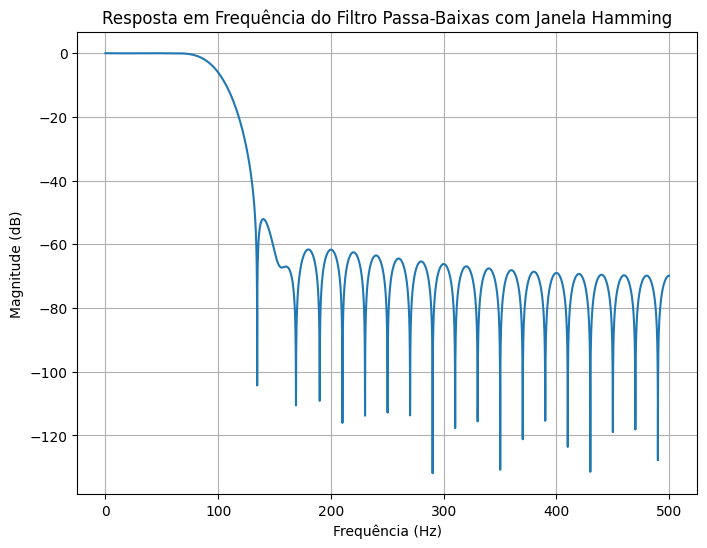

In [28]:
fs = 1000  # Frequência de amostragem (Hz)
fc = 100   # Frequência de corte (Hz)
num_taps = 51  # Número de coeficientes do filtro (ordem do filtro + 1)

# Geração da janela Hamming
hamming_window = np.hamming(num_taps)

plt.stem(hamming_window)
plt.title("Janela Hamming")
plt.show()

plt.plot(np.abs(np.fft.fft(hamming_window, 1000)))
plt.title("FFT da Janela Hamming")
plt.show()

n = np.arange(num_taps)
ideal_lp = np.sinc(2 * fc / fs * (n - (num_taps - 1) / 2))
filter_taps = ideal_lp * hamming_window
filter_taps /= np.sum(filter_taps)  # Normalização para ganho unitári

# Resposta em frequência
w, h = freqz(filter_taps, worN=8000, fs=fs)

# Plotando a resposta em frequência
plt.figure(figsize=(8, 6))
plt.plot(w, 20 * np.log10(abs(h)))
plt.title("Resposta em Frequência do Filtro Passa-Baixas com Janela Hamming")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()